In [2]:
!pip install numpy
!pip install cplex
!pip install qiskit-optimization


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


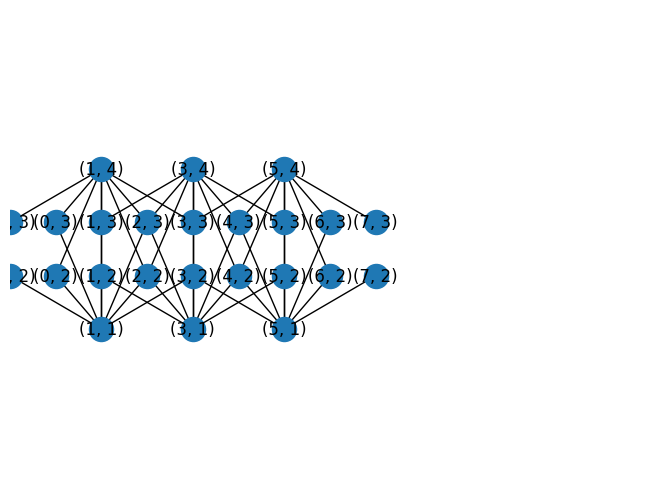

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        G.add_edge(tuple(node2), (i,j))
    

# Draw the graph
pos = {node: node for node in G.nodes()} 
nx.draw(G, pos, with_labels=True)

plt.xlim(-1, 13)
plt.ylim(-2, 7)

plt.xticks(range(0, 13))
plt.yticks(range(1, 7))

plt.show()


In [4]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx

m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

max_deg = 0

for v in G.nodes():
    v_deg = G.degree[v]
    if max_deg <= v_deg:
        max_deg = v_deg

print(max_deg)

y = m.integer_var_dict(points3, name='y',lb=0, ub=max_deg)

#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
    m.add_constraint(y[node] <= G.degree[node])
    m.add_constraint(y[node] >= 1)

#Link the relation between edge activation and lidar placement activation
for node in points3:
    m.add_constraint(y[node] == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))
#dvar bool x[6];
#dvar bool y[14];

8
// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[6];
dvar int y[14];

minimize
 x_1_1 + x_3_1 + x_5_1 + x_1_4 + x_3_4 + x_5_4;
 
subject to {
 y_0_2 <= 2;
 y_0_2 >= 1;
 y_0_3 <= 2;
 y_0_3 >= 1;
 y_1_2 <= 3;
 y_1_2 >= 1;
 y_1_3 <= 3;
 y_1_3 >= 1;
 y_2_2 <= 4;
 y_2_2 >= 1;
 y_2_3 <= 4;
 y_2_3 >= 1;
 y_3_2 <= 4;
 y_3_2 >= 1;
 y_3_3 <= 4;
 y_3_3 >= 1;
 y_4_2 <= 4;
 y_4_2 >= 1;
 y_4_3 <= 4;
 y_4_3 >= 1;
 y_5_2 <= 3;
 y_5_2 >= 1;
 y_5_3 <= 3;
 y_5_3 >= 1;
 y_6_2 <= 2;
 y_6_2 >= 1;
 y_6_3 <= 2;
 y_6_3 >= 1;
 y_0_2 == x_1_1 + x_1_4;
 y_0_3 == x_1_1 + x_1_4;
 y_1_2 == x_1_1 + x_3_1 + x_1_4;
 y_1_3 == x_1_1 + x_1_4 + x_3_4;
 y_2_2 == x_1_1 + x_3_1 + x_1_4 + x_3_4;
 y_2_3 == x_1_1 + x_3_1 + x_1_4 + x_3_4;
 y_3_2 == x_1_1 + x_3_1 + x_5_1 + x_3_4;
 y_3_3 == x_3_1 + x_1_4 + x_3_4 + x_5_4;
 y_4_2 == x_3_1 + x_5_1 + x_3_4 + x_5_4;
 y_4_3 == x_3_1 + x_5_1 + x_3_4 + x_5_4;
 y_5_2 == x_3_1 + x_5_1 + x_5_4;
 y_5_3 == x_5_1 + x_3_4 + x_5_4;
 y_6_2 == 

'c:\\Users\\CYTech Student\\workspace\\BMW.lp'

In [5]:
sol_model = m.solve()
m.print_solution()

objective: 2
status: OPTIMAL_SOLUTION(2)
  x_5_1=1
  x_1_4=1
  y_0_2=1
  y_0_3=1
  y_1_2=1
  y_1_3=1
  y_2_2=1
  y_2_3=1
  y_3_2=1
  y_3_3=1
  y_4_2=1
  y_4_3=1
  y_5_2=1
  y_5_3=1
  y_6_2=1
  y_6_3=1


In [6]:
for (x, y) in sol_model.iter_var_values():
    sx = str(x)
    if sx[0] == 'x':
        print(x)
        print(y)

x_5_1
1.0
x_1_4
1.0


In [7]:
quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())
#6 binary variables
#14 integer variables

Problem name: BMW

Minimize
  x_1_1 + x_1_4 + x_3_1 + x_3_4 + x_5_1 + x_5_4

Subject to
  Linear constraints (42)
    y_0_2 <= 2  'c1'
    y_0_2 >= 1  'c2'
    y_0_3 <= 2  'c3'
    y_0_3 >= 1  'c4'
    y_1_2 <= 3  'c5'
    y_1_2 >= 1  'c6'
    y_1_3 <= 3  'c7'
    y_1_3 >= 1  'c8'
    y_2_2 <= 4  'c9'
    y_2_2 >= 1  'c10'
    y_2_3 <= 4  'c11'
    y_2_3 >= 1  'c12'
    y_3_2 <= 4  'c13'
    y_3_2 >= 1  'c14'
    y_3_3 <= 4  'c15'
    y_3_3 >= 1  'c16'
    y_4_2 <= 4  'c17'
    y_4_2 >= 1  'c18'
    y_4_3 <= 4  'c19'
    y_4_3 >= 1  'c20'
    y_5_2 <= 3  'c21'
    y_5_2 >= 1  'c22'
    y_5_3 <= 3  'c23'
    y_5_3 >= 1  'c24'
    y_6_2 <= 2  'c25'
    y_6_2 >= 1  'c26'
    y_6_3 <= 2  'c27'
    y_6_3 >= 1  'c28'
    -x_1_1 - x_1_4 + y_0_2 == 0  'c29'
    -x_1_1 - x_1_4 + y_0_3 == 0  'c30'
    -x_1_1 - x_1_4 - x_3_1 + y_1_2 == 0  'c31'
    -x_1_1 - x_1_4 - x_3_4 + y_1_3 == 0  'c32'
    -x_1_1 - x_1_4 - x_3_1 - x_3_4 + y_2_2 == 0  'c33'
    -x_1_1 - x_1_4 - x_3_1 - x_3_4 + y_2_3 == 0  'c3

In [8]:
from qiskit_optimization.converters import QuadraticProgramToQubo
#le qubo

conv = QuadraticProgramToQubo()
qp = conv.convert(quadratic_program)
#print(qp.get_num_binary_vars)
#print(qp.prettyprint())
#Binary variables = 138

In [9]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx

m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

#max_deg = max(G.degree(v) for v in G.nodes())
#y = m.integer_var_dict(points3, lb=0, ub=max_deg, name='y')
y = [m.binary_var_dict(G.degree(node), name='z_'+str(node)) for node in points3]

#constraint on number of activate edge
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) >= 1)
    m.add_constraint(sum(y[G.degree(node)].values()) <= G.degree(node))

#constraint link active edge and node 
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))
sol_model = m.solve()
m.print_solution()

# dvar bool x[6];
# dvar bool z_(0, 2)[2];
# dvar bool z_(0, 3)[2];
# dvar bool z_(1, 2)[3];
# dvar bool z_(1, 3)[3];
# dvar bool z_(2, 2)[4];
# dvar bool z_(2, 3)[4];
# dvar bool z_(3, 2)[4];
# dvar bool z_(3, 3)[4];
# dvar bool z_(4, 2)[4];
# dvar bool z_(4, 3)[4];
# dvar bool z_(5, 2)[3];
# dvar bool z_(5, 3)[3];
# dvar bool z_(6, 2)[2];
# dvar bool z_(6, 3)[2];
#44 z

// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[6];
dvar bool z_(0, 2)[2];
dvar bool z_(0, 3)[2];
dvar bool z_(1, 2)[3];
dvar bool z_(1, 3)[3];
dvar bool z_(2, 2)[4];
dvar bool z_(2, 3)[4];
dvar bool z_(3, 2)[4];
dvar bool z_(3, 3)[4];
dvar bool z_(4, 2)[4];
dvar bool z_(4, 3)[4];
dvar bool z_(5, 2)[3];
dvar bool z_(5, 3)[3];
dvar bool z_(6, 2)[2];
dvar bool z_(6, 3)[2];

minimize
 x_1_1 + x_3_1 + x_5_1 + x_1_4 + x_3_4 + x_5_4;
 
subject to {
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1;
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2;
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1;
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3;
 z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1;
 z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4;
 z_(2,_2)_0 + z_(2,_2)_1 + z_(2,

In [10]:
quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())
#16 Binary variables

Problem name: BMW

Minimize
  x_1_1 + x_1_4 + x_3_1 + x_3_4 + x_5_1 + x_5_4

Subject to
  Linear constraints (42)
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1  'c1'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2  'c2'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1  'c3'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2  'c4'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1  'c5'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3  'c6'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1  'c7'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3  'c8'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c9'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c10'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c11'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c12'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c13'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c14'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c15'
    z_(2,

In [20]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
# le qubo
conv = QuadraticProgramToQubo()
qp = conv.convert(quadratic_program)
#print(qp.objective.linear.to_array())
#print(qp.objective.linear.coefficients)
#print(qp.objective.quadratic.to_array())
matrice = qp.objective.quadratic.coefficients.asformat("array")
diagonal = qp.objective.linear.coefficients.asformat("array")
num = 0
num1 = 0
for i in range (len(matrice)):
    num1 = 0
    for j in range(len(matrice[i])):
        num1 += 1
        if j == i:
            matrice[i][j] += diagonal[0][j]
    num += 1
matrice2 = np.zeros((81,81))
matrice2[:78,:78] = matrice


print(num, num1)
    # print("diagonal = ",diagonal[0][i])
print(type(matrice))
np.save("matrice_QUBO.npy",matrice2)
# print(qp.objective.constant)
# print(qp.objective.quadratic)
# print(qp.binary_var_list(78)[0].as_tuple())
# for n in qp.integer_var_dict(60).items():
#     print(n[1].name)
# print(qp.integer_var_dict)
#print(qp.prettyprint())

# def extract_qubo_coefficients(qp: QuadraticProgram) -> np.ndarray:
#     num_variables = qp.get_num_vars()
#     qubo_matrix = np.zeros((num_variables, num_variables))

#     for i in range(num_variables):
#         # Coefficient of linear term
#         # qubo_matrix[i, i] = 
#         print("qp.get_variable(",i,")",qp.get_variable(i))
#         print("qp.get_variable(",i,")",qp.objective.linear)
#         # qp.get_linear_coefficient
#         # (qp.get_variable(i))

#         # Coefficients of quadratic terms
#         for j in range(i + 1, num_variables):
#             print("qp.get_variable(",i,")",qp.get_variable(i), "qp.get_variable(",j,")",qp.get_variable(j))
#             # qubo_matrix[i, j] = qp.objective.linear.coefficients(qp.get_variable(i), qp.get_variable(j))
#             # qubo_matrix[j, i] = qubo_matrix[i, j]  # QUBO matrix is symmetric
#     return qubo_matrix

# # Assuming you have a QuadraticProgram named 'quadratic_program'
# qubo_matrix = extract_qubo_coefficients(quadratic_program)
# print(qubo_matrix)
# print(qp.prettyprint())
# #Binary variables = 78

78 78
<class 'numpy.ndarray'>
